# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Ayudha Kusuma Rahmadhani
- **Email:** yudhadeux@gmail.com

## Menentukan Pertanyaan Bisnis



1.   Produk apa dengan jumlah pembelian terbesar?
2.   Berapa tingkat kepuasan pembeli terhadap layanan?
3.   Bagaimana data pembelian order setiap bulannya?




## Import Semua Packages/Library

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import matplotlib.dates as mdates
!pip install unidecode
from unidecode import unidecode

In [298]:
path = "data"
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]

In [299]:
df_list = []

for file in csv_files:
    file_path = os.path.join(path, file)
    df = pd.read_csv(file_path)
    print(df.head())
    df_list.append(df)

e_commerce_df = pd.concat(df_list, ignore_index=True)

                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3           

In [300]:
# hitung banyak file
num_files = len(csv_files)
print(f"Jumlah file CSV dalam dataset: {num_files}")
print("Nama-nama file CSV dalam dataset:")
for file in csv_files:
    print(file)

Jumlah file CSV dalam dataset: 9
Nama-nama file CSV dalam dataset:
order_reviews_dataset.csv
products_dataset.csv
geolocation_dataset.csv
order_payments_dataset.csv
sellers_dataset.csv
customers_dataset.csv
orders_dataset.csv
product_category_name_translation.csv
order_items_dataset.csv


In [301]:
e_commerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550922 entries, 0 to 1550921
Data columns (total 45 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   review_id                      99224 non-null    object 
 1   order_id                       415201 non-null   object 
 2   review_score                   99224 non-null    float64
 3   review_comment_title           11568 non-null    object 
 4   review_comment_message         40977 non-null    object 
 5   review_creation_date           99224 non-null    object 
 6   review_answer_timestamp        99224 non-null    object 
 7   product_id                     145601 non-null   object 
 8   product_category_name          32412 non-null    object 
 9   product_name_lenght            32341 non-null    float64
 10  product_description_lenght     32341 non-null    float64
 11  product_photos_qty             32341 non-null    float64
 12  product_weight

## Data Dictionary / Penjelasan Kolom Dataset E-Commerce

### Informasi Review
- **review_id**  
  ID unik untuk setiap ulasan pelanggan.

- **order_id**  
  ID pesanan yang terkait dengan ulasan.

- **review_score**  
  Nilai rating yang diberikan pelanggan (biasanya skala 1–5).

- **review_comment_title**  
  Judul singkat dari ulasan pelanggan.

- **review_comment_message**  
  Isi komentar atau pesan ulasan pelanggan.

- **review_creation_date**  
  Tanggal saat ulasan dibuat.

- **review_answer_timestamp**  
  Waktu saat ulasan dijawab oleh penjual / sistem.

---

### Informasi Produk
- **product_id**  
  ID unik produk.

- **product_category_name**  
  Nama kategori produk dalam bahasa asli dataset.

- **product_name_lenght**  
  Panjang jumlah karakter nama produk.

- **product_description_lenght**  
  Panjang jumlah karakter deskripsi produk.

- **product_photos_qty**  
  Jumlah foto produk yang tersedia.

- **product_weight_g**  
  Berat produk dalam gram.

- **product_length_cm**  
  Panjang produk dalam sentimeter.

- **product_height_cm**  
  Tinggi produk dalam sentimeter.

- **product_width_cm**  
  Lebar produk dalam sentimeter.

---

### Informasi Lokasi Pelanggan (Geolocation)
- **geolocation_zip_code_prefix**  
  Kode pos wilayah pelanggan (prefix).

- **geolocation_lat**  
  Garis lintang (latitude) lokasi pelanggan.

- **geolocation_lng**  
  Garis bujur (longitude) lokasi pelanggan.

- **geolocation_city**  
  Kota pelanggan.

- **geolocation_state**  
  Provinsi / negara bagian pelanggan.

---

### Informasi Pembayaran
- **payment_sequential**  
  Urutan metode pembayaran jika lebih dari satu metode digunakan.

- **payment_type**  
  Jenis metode pembayaran (credit card, debit, dll).

- **payment_installments**  
  Jumlah cicilan pembayaran.

- **payment_value**  
  Total nilai pembayaran.

---

### Informasi Penjual
- **seller_id**  
  ID unik penjual.

- **seller_zip_code_prefix**  
  Kode pos lokasi penjual.

- **seller_city**  
  Kota penjual.

- **seller_state**  
  Provinsi / negara bagian penjual.

---

### Informasi Pelanggan
- **customer_id**  
  ID unik pelanggan.

- **customer_unique_id**  
  ID unik pelanggan yang konsisten meskipun melakukan banyak transaksi.

- **customer_zip_code_prefix**  
  Kode pos pelanggan.

- **customer_city**  
  Kota pelanggan.

- **customer_state**  
  Provinsi / negara bagian pelanggan.

---

### Informasi Pesanan (Order)
- **order_status**  
  Status pesanan (delivered, shipped, canceled, dll).

- **order_purchase_timestamp**  
  Waktu saat pesanan dibuat.

- **order_approved_at**  
  Waktu pesanan disetujui.

- **order_delivered_carrier_date**  
  Waktu pesanan diserahkan ke kurir.

- **order_delivered_customer_date**  
  Waktu pesanan diterima pelanggan.

- **order_estimated_delivery_date**  
  Perkiraan tanggal pengiriman.

---

### Informasi Kategori Produk (Terjemahan)
- **product_category_name_english**  
  Nama kategori produk dalam bahasa Inggris.

---

### Informasi Pengiriman
- **order_item_id**  
  Nomor item dalam satu pesanan.

- **shipping_limit_date**  
  Batas waktu pengiriman oleh penjual.

- **price**  
  Harga produk.

- **freight_value**  
  Biaya ongkos kirim.


In [302]:
df_customers = pd.read_csv('data/customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [303]:
df_geolocation = pd.read_csv('data/geolocation_dataset.csv')
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [304]:
df_order_items=pd.read_csv('data/order_items_dataset.csv')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [305]:
df_order_payment=pd.read_csv('data/order_payments_dataset.csv')
df_order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [306]:
df_order_reviews=pd.read_csv('data/order_reviews_dataset.csv')
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [307]:
df_orders=pd.read_csv('data/orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [308]:
df_products=pd.read_csv('data/products_dataset.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [309]:
df_sellers=pd.read_csv('data/sellers_dataset.csv')
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [310]:
df_product_category=pd.read_csv('data/product_category_name_translation.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## Assessing Data

In [311]:
# buat tabel berisi Kolom, Banyak Missing Value, dan Persentase Missing Value
cek_missing = pd.DataFrame({
    'Kolom': e_commerce_df.columns,
    'Banyak Missing Value': e_commerce_df.isnull().sum(),
    'Persentase Missing Value': e_commerce_df.isnull().mean() * 100
})
cek_missing

,Kolom,Banyak Missing Value,Persentase Missing Value
review_id,review_id,1451698,93.602257
order_id,order_id,1135721,73.228763
review_score,review_score,1451698,93.602257
review_comment_title,review_comment_title,1539354,99.254121
review_comment_message,review_comment_message,1509945,97.357894
review_creation_date,review_creation_date,1451698,93.602257
review_answer_timestamp,review_answer_timestamp,1451698,93.602257
product_id,product_id,1405321,90.611971
product_category_name,product_category_name,1518510,97.910146
product_name_lenght,product_name_lenght,1518581,97.914724


In [312]:
e_commerce_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,payment_sequential,payment_type,payment_installments,payment_value,seller_id,seller_zip_code_prefix,seller_city,seller_state,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name_english,order_item_id,shipping_limit_date,price,freight_value
count,99224,415201,99224.000000,11568,40977,99224,99224,145601,32412,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163,103886.000000,103886,103886.000000,103886.000000,115745,3095.000000,3095,3095,198882,99441,99441.000000,99441,99441,99441,99441,99281,97658,96476,99441,71,112650.000000,112650,112650.000000,112650.000000
unique,98410,99441,NaN,4527,36159,636,98248,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8011,27,NaN,5,NaN,NaN,3095,NaN,611,23,99441,96096,NaN,4119,27,8,98875,90733,81018,95664,459,71,NaN,93318,NaN,NaN
top,4548534449b1f572e357211b90724f1b,fa65dad1b0e818e3ccc5cb0e39231352,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05,aca2eb7d00ea1a7b8ebd4e68314663af,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sao paulo,SP,NaN,credit_card,NaN,NaN,6560211a19b47992c3666cc44a7e94c0,NaN,sao paulo,SP,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00,health_beauty,NaN,2017-07-21 18:25:23,NaN,NaN
freq,3,32,NaN,423,230,463,4,528,3030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135800,404268,NaN,76795,NaN,NaN,2034,NaN,694,1849,2,17,NaN,15540,41746,96478,3,9,47,3,522,1,NaN,21,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN,1.092679,NaN,2.853349,154.100380,NaN,32291.059451,NaN,NaN,NaN,NaN,35137.474583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.197834,NaN,120.653739,19.990320
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN,0.706584,NaN,2.687051,217.494064,NaN,32713.453830,NaN,NaN,NaN,NaN,29797.938996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.705124,NaN,183.633928,15.806405
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,1001.000000,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.850000,0.000000
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN,1.000000,NaN,1.000000,56.790000,NaN,7093.500000,NaN,NaN,NaN,NaN,11347.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,39.900000,13.080000
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN,1.000000,NaN,1.000000,100.000000,NaN,14940.000000,NaN,NaN,NaN,NaN,24416.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,74.990000,16.260000
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN,1.000000,NaN,4.000000,171.837500,NaN,64552.500000,NaN,NaN,NaN,NaN,58900.000000,NaN,NaN,NaN,NaN,NaN,N

## Cleaning Data

In [313]:
# cek nilai unik dalam kolom kategorikal dataset e-commerce
categorical_columns = [
    'order_status',
    'payment_type',
    'product_category_name',
    'customer_city',
    'customer_state',
    'seller_city',
    'seller_state',
    'review_score'
]

for col in categorical_columns:
    if col in e_commerce_df.columns:
        unique_values = e_commerce_df[col].unique()
        print(f"Kolom '{col}' memiliki {len(unique_values)} nilai unik")
        print(unique_values[:10])  # tampilkan 10 contoh saja
        print("\n")
    else:
        print(f"Kolom '{col}' tidak ditemukan di dataset\n")


Kolom 'order_status' memiliki 9 nilai unik
[nan 'delivered' 'invoiced' 'shipped' 'processing' 'unavailable'
 'canceled' 'created' 'approved']


Kolom 'payment_type' memiliki 6 nilai unik
[nan 'credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


Kolom 'product_category_name' memiliki 74 nilai unik
[nan 'perfumaria' 'artes' 'esporte_lazer' 'bebes' 'utilidades_domesticas'
 'instrumentos_musicais' 'cool_stuff' 'moveis_decoracao'
 'eletrodomesticos']


Kolom 'customer_city' memiliki 4120 nilai unik
[nan 'franca' 'sao bernardo do campo' 'sao paulo' 'mogi das cruzes'
 'campinas' 'jaragua do sul' 'timoteo' 'curitiba' 'belo horizonte']


Kolom 'customer_state' memiliki 28 nilai unik
[nan 'SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES']


Kolom 'seller_city' memiliki 612 nilai unik
[nan 'campinas' 'mogi guacu' 'rio de janeiro' 'sao paulo'
 'braganca paulista' 'brejao' 'penapolis' 'curitiba' 'anapolis']


Kolom 'seller_state' memiliki 24 nilai unik
[nan 'SP' 'RJ' 'PE' 'PR' 'GO' 'SC' 'BA' '

In [314]:
orders_col=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in orders_col:
    df_orders[col]=pd.to_datetime(df_orders[col])

In [315]:
order_review_col=['review_creation_date','review_answer_timestamp']
for col in order_review_col:
    df_order_reviews[col]=pd.to_datetime(df_order_reviews[col])

In [316]:
order_item_col=['shipping_limit_date']
for col in order_item_col:
    df_order_items[col]=pd.to_datetime(df_order_items[col])

In [317]:
e_commerce_df.duplicated().sum()

np.int64(261831)

In [318]:
e_commerce_df.drop_duplicates(inplace=True)

In [319]:
e_commerce_df.duplicated().sum()

np.int64(0)

In [320]:
df_order_reviews.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [321]:
df_order_reviews["review_comment_title"].fillna("No Title", inplace=True)
df_order_reviews["review_comment_message"].fillna("No Message", inplace=True)

/tmp/ipython-input-3177758972.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_order_reviews["review_comment_title"].fillna("No Title", inplace=True)
/tmp/ipython-input-3177758972.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [322]:
df_orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [323]:
df_products.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


### ## Exploratory Data Analysis (EDA)

In [324]:
e_commerce_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,payment_sequential,payment_type,payment_installments,payment_value,seller_id,seller_zip_code_prefix,seller_city,seller_state,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name_english,order_item_id,shipping_limit_date,price,freight_value
count,99224,415201,99224.000000,11568,40977,99224,99224,145601,32412,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000,738332.000000,738332.000000,738332.000000,738332,738332,103886.000000,103886,103886.000000,103886.000000,115745,3095.000000,3095,3095,198882,99441,99441.000000,99441,99441,99441,99441,99281,97658,96476,99441,71,112650.000000,112650,112650.000000,112650.000000
unique,98410,99441,NaN,4527,36159,636,98248,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8011,27,NaN,5,NaN,NaN,3095,NaN,611,23,99441,96096,NaN,4119,27,8,98875,90733,81018,95664,459,71,NaN,93318,NaN,NaN
top,4548534449b1f572e357211b90724f1b,fa65dad1b0e818e3ccc5cb0e39231352,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05,aca2eb7d00ea1a7b8ebd4e68314663af,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sao paulo,SP,NaN,credit_card,NaN,NaN,6560211a19b47992c3666cc44a7e94c0,NaN,sao paulo,SP,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00,health_beauty,NaN,2017-07-21 18:25:23,NaN,NaN
freq,3,32,NaN,423,230,463,4,528,3030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79927,285976,NaN,76795,NaN,NaN,2034,NaN,694,1849,2,17,NaN,15540,41746,96478,3,9,47,3,522,1,NaN,21,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728,38316.086800,-20.998353,-46.461098,NaN,NaN,1.092679,NaN,2.853349,154.100380,NaN,32291.059451,NaN,NaN,NaN,NaN,35137.474583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.197834,NaN,120.653739,19.990320
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047,30632.496675,5.892315,4.393705,NaN,NaN,0.706584,NaN,2.687051,217.494064,NaN,32713.453830,NaN,NaN,NaN,NaN,29797.938996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.705124,NaN,183.633928,15.806405
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,-36.605374,-101.466766,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,1001.000000,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.850000,0.000000
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,12600.000000,-23.603061,-48.867822,NaN,NaN,1.000000,NaN,1.000000,56.790000,NaN,7093.500000,NaN,NaN,NaN,NaN,11347.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,39.900000,13.080000
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,29144.000000,-22.873588,-46.647278,NaN,NaN,1.000000,NaN,1.000000,100.000000,NaN,14940.000000,NaN,NaN,NaN,NaN,24416.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,74.990000,16.260000
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000,65950.000000,-19.923336,-43.836974,NaN,NaN,1.000000,NaN,4.000000,171.837500,NaN,64552.500000,NaN,NaN,NaN,NaN,58900.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,134.900000

In [325]:
df_customers.groupby(by='customer_city')['customer_id'].nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
agisse,1
vieiras,1
bertopolis,1


### Explore df_geolocation

In [326]:
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [327]:
(df_geolocation['geolocation_city']=='são paulo').sum()

np.int64(24918)

In [328]:
df_geolocation['geolocation_city'] = df_geolocation['geolocation_city'].apply(lambda x: unidecode(x))

In [329]:
df_geolocation.groupby(by=['geolocation_city','geolocation_state'])['geolocation_zip_code_prefix'].size().sort_values(ascending=False).reset_index()

,geolocation_city,geolocation_state,geolocation_zip_code_prefix
0,sao paulo,SP,160716
1,rio de janeiro,RJ,62149
2,belo horizonte,MG,27805
3,curitiba,PR,16593
4,porto alegre,RS,13521
...,...,...,...
6345,santa rita do novo destino,GO,1
6346,santa rita do cedro,MG,1
6347,tabuao,MG,1
6348,tabai,RS,1


In [330]:
df_order_payment.groupby(by='payment_type')['order_id'].size().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


In [331]:
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [332]:
cust_orders_df = pd.merge(
    left=df_customers,
    right=df_orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
cust_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


mengabungkan df_products dan df_catagory

In [333]:
new_df_products=pd.merge(
    left=df_products,
    right=df_product_category,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

In [334]:
col = new_df_products.pop('product_category_name_english')
new_df_products.insert(2, col.name, col)
new_df_products.head()

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [335]:
df_order_payment.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
82124,67e5683ee43c8f5d4c0b46f7f8932ac8,1,credit_card,2,112.73
68986,7a2caaaf6f039835babfdf9aea003412,1,credit_card,3,789.04
61858,525c4dbcaecd35a5fac2e4053589df08,1,credit_card,7,520.00
20879,8c46303a8d94eac65d84d4e8b500b65d,1,credit_card,10,178.56
101798,1b2a464e418c7636f68934adaa8571ce,1,credit_card,1,155.33
22956,08fc40afed49b10079c4c6a31ffc093b,1,credit_card,6,156.22
80918,ad807dc9b0ee5724709ced19ab71525a,1,boleto,1,738.67
70454,5e8dbd76385140aefb062d9ed31c7a75,1,credit_card,10,667.99
54932,a484a3b382ad9e61385e85f22607e135,1,credit_card,8,672.82
658,6d60fdb8565707824a98431255d3183a,1,credit_card,1,26.45


In [336]:
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [337]:
m1=pd.merge(
    left=cust_orders_df,
    right=df_order_payment,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
m1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25


In [338]:
m2=pd.merge(
    left=m1,
    right=df_order_items,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
m2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [339]:
m3=pd.merge(
    left=m2,
    right=new_df_products,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
m3.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [340]:
m4=pd.merge(
    left=m3,
    right=df_sellers,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
m4.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP


In [341]:
pd.set_option('display.max_columns', None)

In [342]:
all_df=pd.merge(
    left=m4,
    right=df_order_reviews,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1.0,credit_card,6.0,88.78,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,livros_interesse_geral,books_general

In [343]:
all_df.describe()

,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_installments,payment_value,order_item_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,review_score,review_creation_date,review_answer_timestamp
count,119143.000000,119143,118966,117057,115722,119143,119140.000000,119140.000000,119140.000000,118310.000000,118310,118310.000000,118310.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000,118146.000000,118146,118146
mean,35033.451298,2017-12-29 18:36:13.115760384,2017-12-30 04:49:18.425726720,2018-01-03 08:24:34.395525376,2018-01-12 20:55:38.199616256,2018-01-22 15:21:10.241642496,1.094737,2.941246,172.735135,1.196543,2018-01-05 22:06:13.308807680,120.646603,20.032387,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413,4.015582,2018-01-11 13:17:50.103092736,2018-01-14 17:00:35.769302528
min,1003.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000,0.000000,0.000000,1.000000,2016-09-19 00:15:34,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,11250.000000,2017-09-10 20:15:46,2017-09-11 15:50:48.500000,2017-09-14 19:52:12,2017-09-22 21:54:31.249999872,2017-10-02 00:00:00,1.000000,1.000000,60.850000,1.000000,2017-09-18 14:30:33,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,4.000000,2017-09-22 00:00:00,2017-09-25 11:15:40.750000128
50%,24240.000000,2018-01-17 11:59:12,2018-01-17 16:49:49,2018-01-23 17:03:08,2018-02-01 03:17:55,2018-02-14 00:00:00,1.000000,2.000000,108.160000,1.000000,2018-01-25 04:11:15.500000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,5.000000,2018-02-01 00:00:00,2018-02-03 12:04:23
75%,58475.000000,2018-05-03 13:18:30,2018-05-03 16:56:53,2018-05-07 14:57:00,2018-05-15 00:08:31.500000,2018-05-25 00:00:00,1.000000,4.000000,189.240000,1.000000,2018-05-10 02:51:40.249999872,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000,5.000000,2018-05-15 00:00:00,2018-05-17 10:48:59
max,99990.000000,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,29.000000,24.000000,13664.080000,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,29823.198969,NaN,NaN,NaN,NaN,NaN,0.730141,2.777848,267.776077,0.699489,NaN,184.109691,15.836850,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511,1.400436,NaN,NaN


### RFM

In [344]:
all_df['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

In [345]:
all_df['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

In [346]:
#Y-M-D
now = datetime(2018, 10, 20)
#now = datetime(2018, 9, 3)

In [347]:
all_df['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

In [348]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Group by 'customer_id' and calculate Recency, Frequency, and Monetary
recency = (now - all_df.groupby('customer_id')['order_purchase_timestamp'].max()).dt.days
frequency = all_df.groupby('customer_id')['order_id'].count()
monetary = all_df.groupby('customer_id')['price'].sum()

# Create a new DataFrame with the calculated metrics
rfm = pd.DataFrame({
    'customer_id': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})

In [349]:
col_list = ['customer_id','Recency','Frequency','Monetary']
rfm.columns = col_list

In [350]:
rfm.sort_values(by='Recency',ascending=True)

,customer_id,Recency,Frequency,Monetary
63970,a4b417188addbc05b26b72d5e44837a1,2,1,0.00
51713,856336203359aa6a61bf3826f7d84c49,3,1,0.00
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,16,1,0.00
74611,bf6181a85bbb4115736c0a8db1a53be3,18,1,0.00
15595,2823ffda607a2316375088e0d00005ec,20,1,0.00
...,...,...,...,...
68946,b106b360fe2ef8849fbbd056f777b4d5,747,1,100.00
52277,86dc2ffce2dfff336de2f386a786e574,764,3,134.97
38013,622e13439d6b5a0b486c435618b2679e,766,1,0.00
40289,683c54fc24d40ee9f8a6fc179fd9856c,774,1,59.50


In [351]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  99441 non-null  object 
 1   Recency      99441 non-null  int64  
 2   Frequency    99441 non-null  int64  
 3   Monetary     99441 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.0+ MB


In [352]:
rfm.sort_values(by='Monetary',ascending=False)

,customer_id,Recency,Frequency,Monetary
8546,1617b1357756262bfa56ab541c47bc16,385,8,13440.00
60184,9af2372a1e49340278e7c1ef8d749f34,547,29,11383.95
86603,de832e8dbb1f588a47013e53feaa67cc,508,15,10856.10
38590,63b964e79dee32a3587651701a2b8dbf,247,24,9888.00
43009,6f241d5bbb142b6f764387c8c270645a,162,7,9520.14
...,...,...,...,...
21291,36b182c39933d55e307096ccc3fd2970,43,1,0.00
68419,afb7c64474a22bed93447022809af886,376,1,0.00
20783,358a7b26ad67e3a183c191ed367e64b3,389,1,0.00
17601,2d6272fc5e22facb8937eba512bad93f,571,1,0.00


In [353]:
rfm.sort_values(by='Recency',ascending=False)

,customer_id,Recency,Frequency,Monetary
3354,08c5351a6aca1c1589a38f244edeee9d,775,2,72.89
40289,683c54fc24d40ee9f8a6fc179fd9856c,774,1,59.50
38013,622e13439d6b5a0b486c435618b2679e,766,1,0.00
52277,86dc2ffce2dfff336de2f386a786e574,764,3,134.97
68946,b106b360fe2ef8849fbbd056f777b4d5,747,1,100.00
...,...,...,...,...
15595,2823ffda607a2316375088e0d00005ec,20,1,0.00
74611,bf6181a85bbb4115736c0a8db1a53be3,18,1,0.00
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,16,1,0.00
51713,856336203359aa6a61bf3826f7d84c49,3,1,0.00


In [354]:
rfm.sort_values(by='Frequency',ascending=False)

,customer_id,Recency,Frequency,Monetary
15183,270c23a11d024a44c896d1894b261a83,437,63,2305.38
7586,13aa59158da63ba0e93ec6ac2c07aacb,391,38,3039.62
60184,9af2372a1e49340278e7c1ef8d749f34,547,29,11383.95
56942,92cd3ec6e2d643d4ebd0e3d6238f69e2,499,26,1299.74
16961,2ba91e12e5e4c9f56b82b86d9031d329,328,24,2397.60
...,...,...,...,...
35429,5b97e86cf344fc8159321fe9a84dbef9,537,1,139.90
35428,5b97e727263e5eda186851ba3abf010e,329,1,649.00
35427,5b97cf3a33ee85a30c7dc07f080b52e0,63,1,199.90
35426,5b96ee26f8456fd365b89600b4f44d4a,195,1,38.90


In [355]:
all_df.groupby(by=['customer_state','product_category_name_english']).agg({
        'price':'sum',

}).sort_values(by='price', ascending=False)

price
customer_state product_category_name_english           
SP             bed_bath_table                 509313.30
               health_beauty                  475928.29
               watches_gifts                  450822.51
               sports_leisure                 403732.12
               computers_accessories          360210.34
...                                                 ...
AL             drinks                             15.49
BA             home_comfort_2                     12.90
ES             home_comfort_2                     12.90
PR             home_comfort_2                     12.90
MS             costruction_tools_tools             6.80

[1356 rows x 1 columns]

In [356]:
all_df.groupby(by=['customer_city','product_category_name_english']).agg({
        'price':'sum',

}).sort_values(by='price', ascending=False)

price
customer_city    product_category_name_english             
sao paulo        health_beauty                    195263.02
                 bed_bath_table                   184140.58
                 watches_gifts                    172269.07
                 sports_leisure                   154139.05
                 computers_accessories            147079.12
...                                                     ...
areal            pet_shop                              5.50
tupa             construction_tools_construction       3.99
palmeira d'oeste computers_accessories                 3.90
caldas novas     fashion_underwear_beach               3.90
hortolandia      construction_tools_construction       0.85

[25199 rows x 1 columns]

### Mengetahui tingkat kepuasan pelanggan

In [357]:
all_df.groupby(by=['review_score'])['customer_id'].size().reset_index().sort_values(ascending=False,by='review_score')

,review_score,customer_id
4,5.0,66343
3,4.0,22319
2,3.0,9894
1,2.0,4162
0,1.0,15428


In [358]:
all_df=pd.merge(
    left=all_df,
    right=rfm,
    how='left',
    right_on='customer_id',
    left_on='customer_id'

)
all_df.sample(5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Recency,Frequency,Monetary
104674,cb047fed186785a0792371ff0b2aff8d,ad3746717b7b8e9d0fba89de1c6d20c9,24723,sao goncalo,RJ,e98405be83624163fbaadf39f502cfb1,delivered,2018-06-06 13:42:03,2018-06-07 13:57:33,2018-06-08 11:33:00,2018-06-19 09:53:30,2018-07-13,1.0,credit_card,4.0,306.24,1.0,4178e16324fd0c9a8e18463caf390cc6,ceaec5548eefc6e23e6607c5435102e7,2018-06-15 13:57:33,265.00,41.24,cool_stuff,cool_stuff,51.0,582.0,1.0,11600.0,65.0,19.0,47.0,3821.0,sao paulo,SP,273772ba069caff28c68d335fff8e474,5.0,No Title,O produto chegou bem antes do prazo. Parabéns ...,2018-06-20,2018-06-20 16:45:13,135,1,265.00
39275,8ad7dfee8e31e2a61e3e4a3053e1104f,a25d8eacf021a69ae692e8546a4ef677,95985,nova alvorada,RS,7838ed6306a99eba3bb421c33864ccb5,delivered,2017-12-19 10:55:08,2017-12-19 11:13:28,2017-12-21 20:47:04,2017-12-28 18:17:46,2018-01-18,1.0,credit_card,2.0,104.20,1.0,38d070104c7e27171e177d581758a90f,fb89df7f89fd1b8f03fa2acca1ba7364,2017-12-26 11:13:28,37.00,15.10,beleza_saude,health_beauty,36.0,498.0,1.0,450.0,16.0,30.0,11.0,85853.0,foz do iguacu,PR,edce1110bebc434444c0f782c7d5257a,4.0,No Title,No Message,2017-12-29,2018-01-02 11:25:18,304,2,74.00
116756,4e14f46d40953ed4867254435e69c5be,d9e174cb2e2c1afff0283d83c4b4c668,1544,sao paulo,SP,3aee056d5b3555ca96a8090761a712b6,delivered,2018-08-24 10:35:52,2018-08-24 10:45:48,2018-08-27 15:18:00,2018-08-29 14:24:47,2018-09-05,1.0,credit_card,1.0,18.74,1.0,ecd4bfa8cb104e8a1655dd59d1332d29,b64d51f0435e884e8de603b1655155ae,2018-09-04 10:45:18,11.35,7.39,utilidades_domesticas,housewares,43.0,165.0,2.0,100.0,30.0,8.0,12.0,7077.0,garulhos,SP,52da86d5bb44272ceea61b30d82438fe,5.0,No Title,No Message,2018-08-30,2018-08-30 17:52:18,56,1,11.35
87488,b1ff51bd725d9c52689b0cde47656bcd,2c6a91479a7dc00d8c9d650d8dee88ca,84063,ponta grossa,PR,a009ada42a46d83328c627c1ffc57f56,delivered,2017-11-06 21:44:01,2017-11-07 05:31:26,2017-11-10 20:46:52,2017-11-20 21:34:36,2017-11-30,1.0,credit_card,2.0,61.01,1.0,9fc98e39f04be8e382d8aa5e259f5489,d2374cbcbb3ca4ab1086534108cc3ab7,2017-11-10 21:55:35,44.90,16.11,cama_mesa_banho,bed_bath_table,29.0,200.0,1.0,600.0,40.0,5.0,30.0,14940.0,ibitinga,SP,a122c50cb9f1b3fcef6225b6d9b873c4,5.0,No Title,No Message,2017-11-21,2017-11-24 03:34:35,347,1,44.90
37163,675e27f6a4dfaf0f608131decc38c806,01ad914ceb44eddfbf992570e6a5ef49,21755,rio de janeiro,RJ,ad6752c93490621478814d2383b62f89,delivered,2018-06-24 18:49:53,2018-06-24 19:20:10,2018-06-29 13:59:00,2018-07-07 02:56:55,2018-08-08,1.0,credit_card,4.0,99.65,1.0,f8077831f3c3f393fb67b93c5acd8daf,213b25e6f54661939f11710a6fddb871,2018-07-04 19:20:10,79.90,19.75,casa_construcao,home_construction,57.0,921.0,7.0,750.0,16.0,20.0,16.0,13321.0,salto,SP,7e5ba361d1e62b6a0d37401cb18a5f51,5.0,No Title,No Message,2018-07-07,2018-07-07 16:04:05,117,1,79.90


In [359]:
# simpan dalacsvm
all_df.to_csv('main_data.csv', index=False)

## VISUALISASI

In [360]:
all_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Recency,Frequency,Monetary
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26,2017-05-30 22:34:40,521,1,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30,2018-02-10 22:43:29,280,1,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15,2018-06-15 12:10:59,153,1,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29,2018-04-02 18:36:47,220,1,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,82,1,230.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1.0,credit_card,6.0,88.78,1.0,ccb4503d9d43d245d3b295d0544f988

In [361]:
product_id_counts = all_df.groupby('product_category_name_english')['product_id'].count().reset_index()
sorted_df = product_id_counts.sort_values(by='product_id', ascending=False)

sorted_df

,product_category_name_english,product_id
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


Menampilkan produk paling banyak dan sedikit terjual

/tmp/ipython-input-4121944294.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.head(5), palette=colors, ax=ax[0])
/tmp/ipython-input-4121944294.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.sort_values(by="product_id", ascending=True).head(5), palette=colors, ax=ax[1])


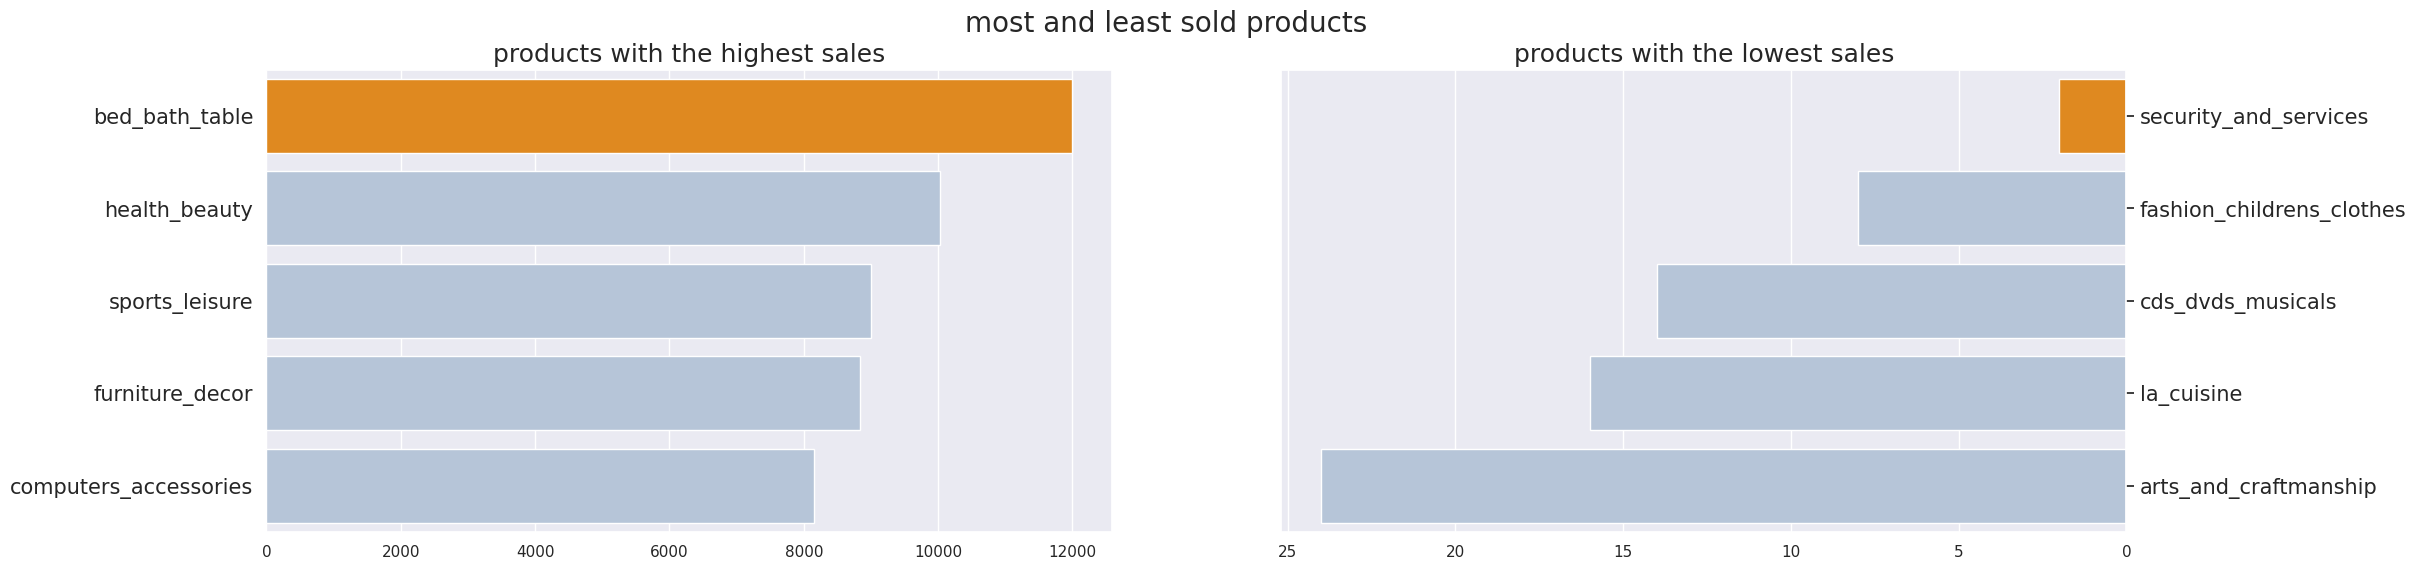

In [362]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#FF8C00", "#B0C4DE", "#B0C4DE", "#B0C4DE", "#B0C4DE"]

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("products with the highest sales", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.sort_values(by="product_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("products with the lowest sales", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("most and least sold products", fontsize=20)
plt.show()


Menampilkan penilaian pelanggan

In [363]:
x=all_df['review_score'].value_counts().sort_values(ascending=False)
x.index
x.values

array([66343, 22319, 15428,  9894,  4162])

/tmp/ipython-input-1746680689.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_service.index,


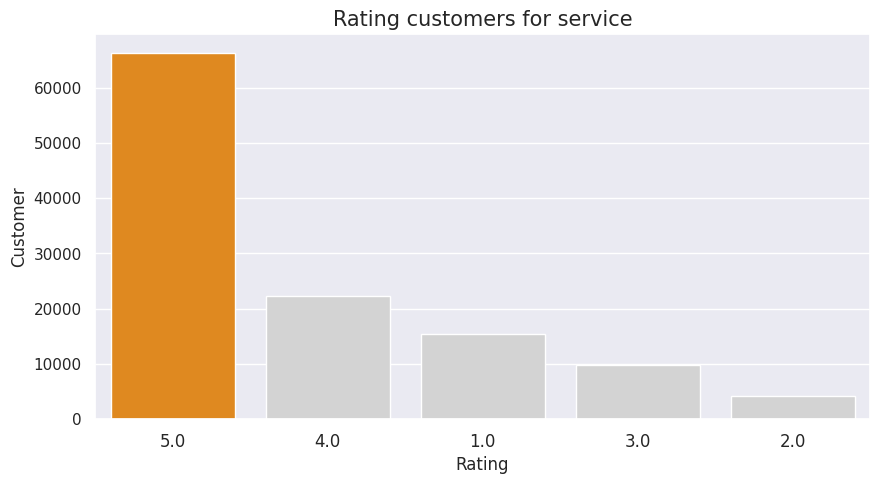

In [364]:
rating_service = all_df['review_score'].value_counts().sort_values(ascending=False)

max_score = rating_service.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=rating_service.index,
            y=rating_service.values,
            order=rating_service.index,
            palette=["#FF8C00" if score == max_score else "#D3D3D3" for score in rating_service.index]
            )

plt.title("Rating customers for service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Customer")
plt.xticks(fontsize=12)
plt.show()


In [365]:
sum_spend_df = all_df.resample(rule='M', on='order_approved_at').agg({
            "price": "sum"
})
sum_spend_df = sum_spend_df.reset_index()
sum_spend_df.rename(columns={
            "price": "total_spend"
        }, inplace=True)

sum_spend_df

/tmp/ipython-input-4280962316.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sum_spend_df = all_df.resample(rule='M', on='order_approved_at').agg({


,order_approved_at,total_spend
0,2016-09-30,134.97
1,2016-10-31,51201.31
2,2016-11-30,0.00
3,2016-12-31,10.90
4,2017-01-31,124313.26
5,2017-02-28,262281.82
6,2017-03-31,394384.70
7,2017-04-30,390306.86
8,2017-05-31,550323.59
9,2017-06-30,461045.05


In [366]:
sum_spend_df['order_approved_at'] = sum_spend_df['order_approved_at'].dt.strftime('%B')

sum_spend_df

,order_approved_at,total_spend
0,September,134.97
1,October,51201.31
2,November,0.00
3,December,10.90
4,January,124313.26
5,February,262281.82
6,March,394384.70
7,April,390306.86
8,May,550323.59
9,June,461045.05


In [367]:
sum_spend_df = sum_spend_df.sort_values('total_spend').drop_duplicates('order_approved_at', keep='last')
sum_spend_df

,order_approved_at,total_spend
12,September,654698.76
13,October,704026.32
15,December,795824.02
17,February,882417.57
22,July,908431.56
23,August,909806.29
21,June,914410.56
16,January,986284.61
19,April,1010481.51
14,November,1039022.61


In [368]:
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a categorical column based on the custom order
sum_spend_df['month_cat'] = pd.Categorical(sum_spend_df['order_approved_at'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the categorical column
sorted_df = sum_spend_df.sort_values(by='month_cat')

# Remove the 'month_cat' column if you don't need it
sorted_df = sorted_df.drop(columns=['month_cat'])

print(sorted_df)

   order_approved_at  total_spend
16           January    986284.61
17          February    882417.57
18             March   1039716.71
19             April   1010481.51
20               May   1056093.87
21              June    914410.56
22              July    908431.56
23            August    909806.29
12         September    654698.76
13           October    704026.32
14          November   1039022.61
15          December    795824.02


JUMLAH PENJUALAN TIAP BULAN

In [369]:
monthly_df = all_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "size",
})
monthly_df

/tmp/ipython-input-2252944532.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = all_df.resample(rule='M', on='order_approved_at').agg({


,order_id
order_approved_at,
2016-09-30,3
2016-10-31,398
2016-11-30,0
2016-12-31,1
2017-01-31,984
2017-02-28,2104
2017-03-31,3263
2017-04-30,2845
2017-05-31,4471


In [370]:
monthly_df.index

DatetimeIndex(['2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30'],
              dtype='datetime64[ns]', name='order_approved_at', freq=None)

In [371]:
monthly_df.index = monthly_df.index.strftime('%B') #mengubah format order_approved_at menjadi Tahun-Bulan
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly_df

,order_approved_at,order_count
0,September,3
1,October,398
2,November,0
3,December,1
4,January,984
5,February,2104
6,March,3263
7,April,2845
8,May,4471
9,June,3863


In [372]:
monthly_df = monthly_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

In [373]:
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_df["month_numeric"] = monthly_df["order_approved_at"].map(month_mapping)
monthly_df = monthly_df.sort_values("month_numeric")
monthly_df = monthly_df.drop("month_numeric", axis=1)

In [374]:
monthly_df

,order_approved_at,order_count
16,January,8541
17,February,8041
18,March,8705
19,April,8075
20,May,8497
21,June,7391
22,July,7234
23,August,7672
12,September,5211
13,October,5630


In [375]:
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_df["month_numeric"] = monthly_df["order_approved_at"].map(month_mapping)
monthly_df = monthly_df.sort_values("month_numeric")
monthly_df = monthly_df.drop("month_numeric", axis=1)

In [376]:
monthly_df

,order_approved_at,order_count
16,January,8541
17,February,8041
18,March,8705
19,April,8075
20,May,8497
21,June,7391
22,July,7234
23,August,7672
12,September,5211
13,October,5630


In [377]:
monthly_df[monthly_df['order_count'] == monthly_df['order_count'].max()]['order_approved_at'].values[0]

'November'

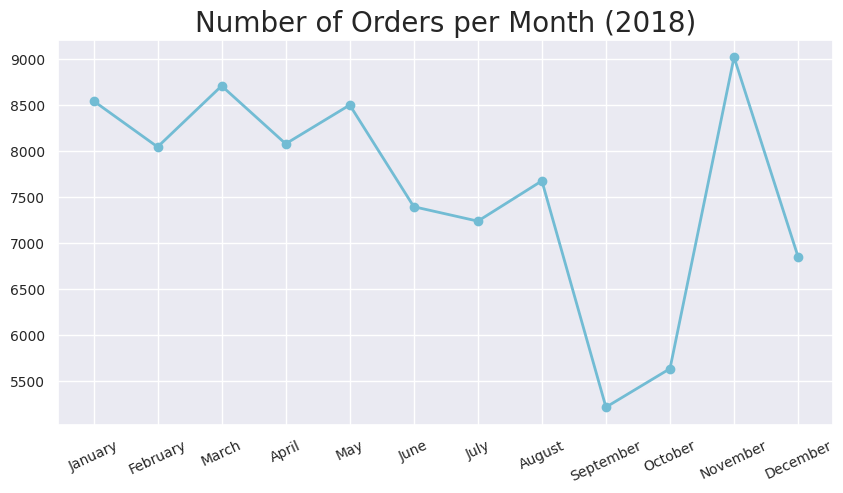

In [378]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_df["order_approved_at"],
    monthly_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

In [379]:
sum_spend_df

,order_approved_at,total_spend,month_cat
12,September,654698.76,September
13,October,704026.32,October
15,December,795824.02,December
17,February,882417.57,February
22,July,908431.56,July
23,August,909806.29,August
21,June,914410.56,June
16,January,986284.61,January
19,April,1010481.51,April
14,November,1039022.61,November


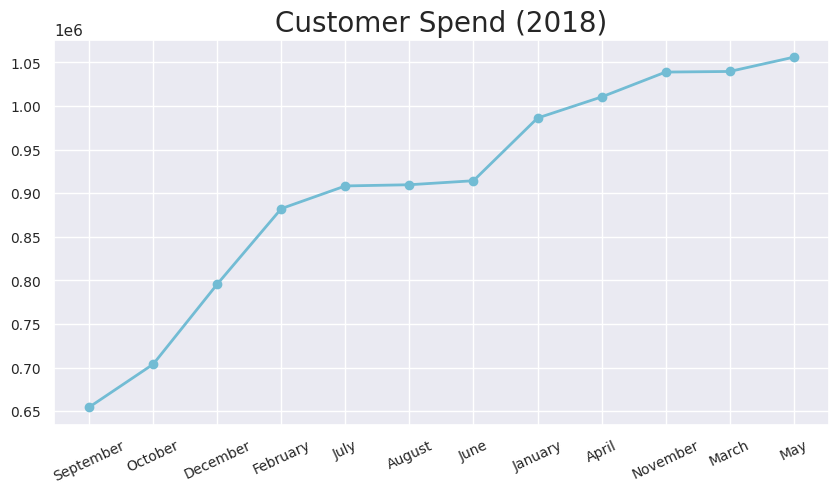

In [380]:
plt.figure(figsize=(10, 5))
plt.plot(
    sum_spend_df["order_approved_at"],
    sum_spend_df["total_spend"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Customer Spend (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

Mengetahui Nilai RFM

In [381]:
rfm


,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,339,1,89.80
1,000161a058600d5901f007fab4c27140,460,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,598,1,179.99
3,0002414f95344307404f0ace7a26f1d5,429,1,149.90
4,000379cdec625522490c315e70c7a9fb,200,1,93.00
...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,204,3,164.70
99437,fffeda5b6d849fbd39689bb92087f431,150,1,47.90
99438,ffff42319e9b2d713724ae527742af25,128,1,199.90
99439,ffffa3172527f765de70084a7e53aae8,412,2,21.80


/tmp/ipython-input-3249284173.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Recency", x="customer_id", data=rfm.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
/tmp/ipython-input-3249284173.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
/tmp/ipython-input-3249284173.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Frequency", x="customer_id", data=rfm.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
/tmp/ipython-input-3249284173.py:26: FutureWarning: 

Passing `palett

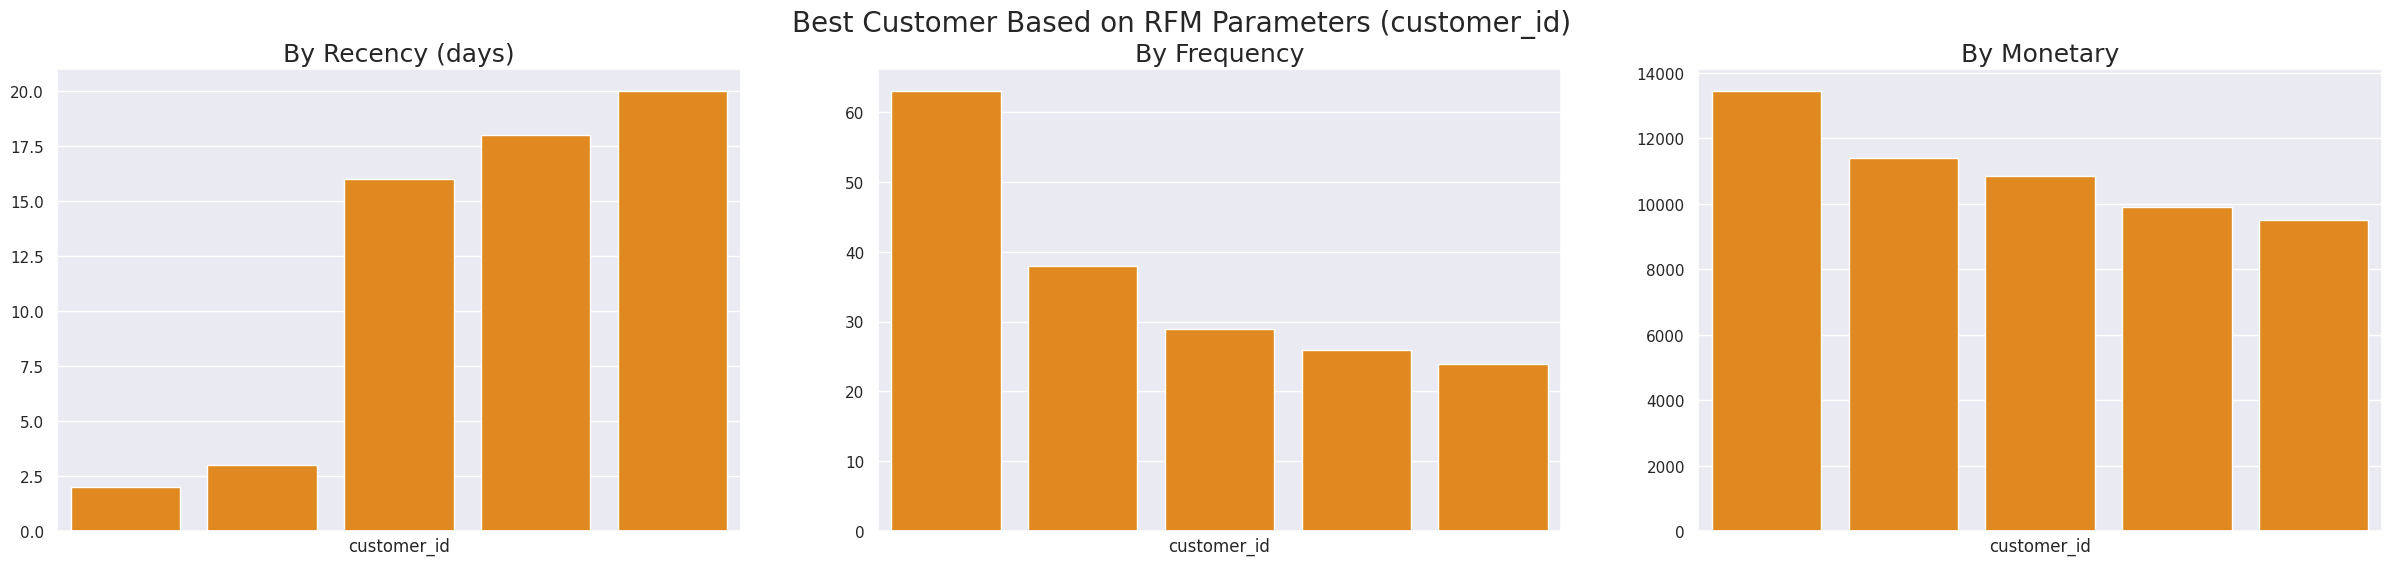

In [382]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#FF8C00", "#FF8C00", "#FF8C00", "#FF8C00", "#FF8C00"]

# beri comentar pada ax[index].set_xticks([]) bila ingin melihat customer nya by id


sns.barplot(y="Recency", x="customer_id", data=rfm.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("customer_id")
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_xticks([])


sns.barplot(y="Frequency", x="customer_id", data=rfm.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('customer_id')
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticks([])


sns.barplot(y="Monetary", x="customer_id", data=rfm.sort_values(by="Monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel('customer_id')
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[2].set_xticks([])


plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

### KESIMPULAN

## Analisis Produk dengan Jumlah Pembelian Terbesar
Berdasarkan hasil visualisasi data, produk dengan jumlah pembelian paling tinggi adalah **beth_bad_table**.  
Sebaliknya, kategori produk dengan jumlah transaksi paling rendah terdapat pada **security_and_service**.  
Perbedaan ini menunjukkan bahwa minat pelanggan terhadap tiap kategori produk tidak merata.

---

## Tingkat Kepuasan Pembeli terhadap Layanan
Secara keseluruhan, tingkat kepuasan pelanggan tergolong **sangat baik**.  
Sebagian besar pelanggan memberikan **rating 5**, sehingga nilai rata-rata ulasan berada di sekitar **4** setelah dilakukan pembulatan.  
Hal ini mengindikasikan bahwa mayoritas pelanggan merasa puas terhadap layanan yang diberikan.

---

## Pola Pembelian Order Setiap Bulan
Data pembelian pelanggan menunjukkan pola yang **fluktuatif**, di mana jumlah transaksi dapat meningkat maupun menurun pada periode tahun tertentu.  
Dari visualisasi yang tersedia, **bulan November** menjadi periode dengan jumlah pembelian tertinggi, sedangkan **bulan September** mencatat jumlah pembelian terendah.
